In [7]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,10

In [4]:
s = tifffile.imread("../../data/franz/WT_25deg_160413-03/P5.tif")

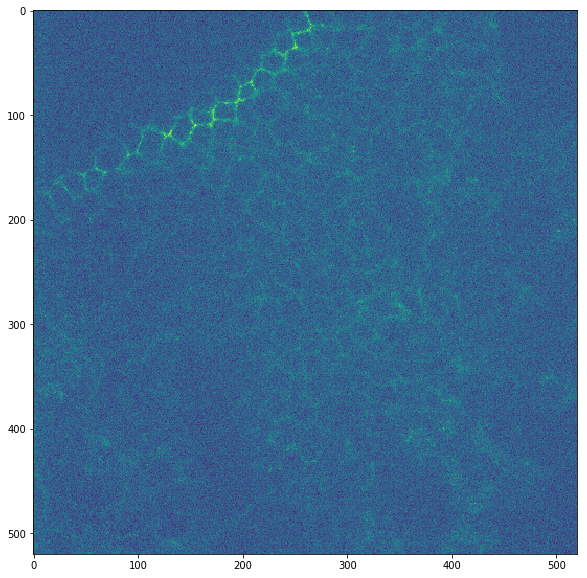

In [96]:
plt.imshow(s[24,:520,:520])

In [70]:
sz,sy,sx = s.shape

In [71]:
sx

692

In [72]:
F = np.zeros((sz,sy,sy))
for k in range(sz):
    F[k] = np.fft.fftshift(np.fft.fft2(s[k,:,:sy] - np.mean(s[k,:,:sy])))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


(<matplotlib.image.AxesImage at 0x10dedc630>,
 <matplotlib.colorbar.Colorbar at 0x110c510f0>)

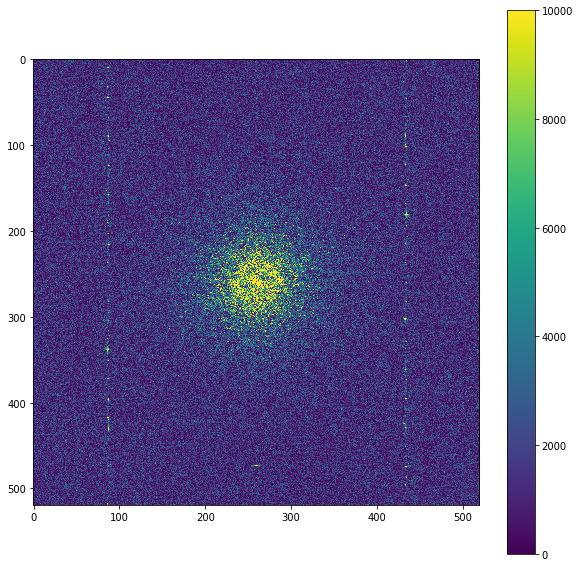

In [73]:
plt.imshow(np.abs(F[18]), vmax=10000), plt.colorbar()

In [74]:
# radial profile

import numpy as np

def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

In [75]:
p1 = radial_profile(np.abs(F[0]),(sy/2,sy/2))

In [76]:
p1.shape

(368,)

In [80]:
profs = []

for i in range(sz):
    profs.append(radial_profile(np.abs(F[i])/np.sum(np.abs(F[i])), (sy/2, sy/2)))

In [81]:
profs = np.array(profs)

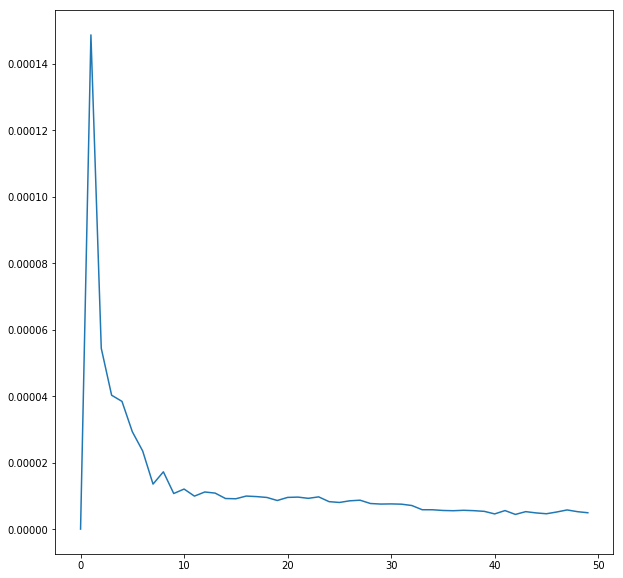

In [95]:
plt.plot(profs[24,0:50])

In [41]:
profs.shape

(50, 553)